In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic


In [ ]:
raw_data = pd.read_excel('/content/drive/MyDrive/Capitalism/Project logistics/ITBLogisticDataset.xlsx')

In [ ]:
df = raw_data.copy()

## DATA UNDERSTANDING

In [ ]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  int64         
 8   Category Name                  180519 non-null  object        
 9   Customer City                  180519 non-null  object        
 10  Customer Country               180519 non-null  object        
 11  

In [ ]:
# Drop unnecessary columns
df = df.drop(columns=['Order Zipcode','Product Description'])

In [ ]:
#Rename the columns
df = df.rename(columns={
    'order date (DateOrders)': 'Order Date',
    'shipping date (DateOrders)': 'Shipping Date',
    'Days for shipping (real)': 'Real Day For Shipment',
    'Days for shipment (scheduled)': 'Scheduled Day For Shipment',
    'Late_delivery_risk': 'Late Delivery Risk',
    'Benefit per order': 'Benefit Per Order',
    'Sales per customer': 'Sales Per Customer'
})


In [ ]:
#Check the duplication
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isna().sum()

,0
Type,0
Real Day For Shipment,0
Scheduled Day For Shipment,0
Benefit Per Order,0
Sales Per Customer,0
Delivery Status,0
Late Delivery Risk,0
Category Id,0
Category Name,0
Customer City,0


In [ ]:
df = df.dropna()

In [ ]:
# Translate the country names
country_mapping = {
    'Puerto Rico': 'Puerto Rico',
    'EE. UU.': 'United States',
    'Indonesia': 'Indonesia',
    'India': 'India',
    'Australia': 'Australia',
    'China': 'China',
    'Japón': 'Japan',
    'Corea del Sur': 'South Korea',
    'Singapur': 'Singapore',
    'Turquía': 'Turkey',
    'Mongolia': 'Mongolia',
    'Estados Unidos': 'United States',
    'Nigeria': 'Nigeria',
    'República Democrática del Congo': 'Democratic Republic of the Congo',
    'Senegal': 'Senegal',
    'Marruecos': 'Morocco',
    'Alemania': 'Germany',
    'Francia': 'France',
    'Países Bajos': 'Netherlands',
    'Reino Unido': 'United Kingdom',
    'Guatemala': 'Guatemala',
    'El Salvador': 'El Salvador',
    'Panamá': 'Panama',
    'República Dominicana': 'Dominican Republic',
    'Venezuela': 'Venezuela',
    'Colombia': 'Colombia',
    'Honduras': 'Honduras',
    'Brasil': 'Brazil',
    'México': 'Mexico',
    'Uruguay': 'Uruguay',
    'Argentina': 'Argentina',
    'Cuba': 'Cuba',
    'Perú': 'Peru',
    'Nicaragua': 'Nicaragua',
    'Ecuador': 'Ecuador',
    'Angola': 'Angola',
    'Sudán': 'Sudan',
    'Somalia': 'Somalia',
    'Costa de Marfil': 'Ivory Coast',
    'Egipto': 'Egypt',
    'Italia': 'Italy',
    'España': 'Spain',
    'Suecia': 'Sweden',
    'Austria': 'Austria',
    'Canada': 'Canada',
    'Madagascar': 'Madagascar',
    'Argelia': 'Algeria',
    'Liberia': 'Liberia',
    'Zambia': 'Zambia',
    'Níger': 'Niger',
    'SudAfrica': 'South Africa',
    'Mozambique': 'Mozambique',
    'Tanzania': 'Tanzania',
    'Ruanda': 'Rwanda',
    'Israel': 'Israel',
    'Nueva Zelanda': 'New Zealand',
    'Bangladés': 'Bangladesh',
    'Tailandia': 'Thailand',
    'Irak': 'Iraq',
    'Arabia Saudí': 'Saudi Arabia',
    'Filipinas': 'Philippines',
    'Kazajistán': 'Kazakhstan',
    'Irán': 'Iran',
    'Myanmar (Birmania)': 'Myanmar',
    'Uzbekistán': 'Uzbekistan',
    'Benín': 'Benin',
    'Camerún': 'Cameroon',
    'Kenia': 'Kenya',
    'Togo': 'Togo',
    'Ucrania': 'Ukraine',
    'Polonia': 'Poland',
    'Portugal': 'Portugal',
    'Rumania': 'Romania',
    'Trinidad y Tobago': 'Trinidad and Tobago',
    'Afganistán': 'Afghanistan',
    'Pakistán': 'Pakistan',
    'Vietnam': 'Vietnam',
    'Malasia': 'Malaysia',
    'Finlandia': 'Finland',
    'Rusia': 'Russia',
    'Irlanda': 'Ireland',
    'Noruega': 'Norway',
    'Eslovaquia': 'Slovakia',
    'Bélgica': 'Belgium',
    'Bolivia': 'Bolivia',
    'Chile': 'Chile',
    'Jamaica': 'Jamaica',
    'Yemen': 'Yemen',
    'Ghana': 'Ghana',
    'Guinea': 'Guinea',
    'Etiopía': 'Ethiopia',
    'Bulgaria': 'Bulgaria',
    'Kirguistán': 'Kyrgyzstan',
    'Georgia': 'Georgia',
    'Nepal': 'Nepal',
    'Emiratos Árabes Unidos': 'United Arab Emirates',
    'Camboya': 'Cambodia',
    'Uganda': 'Uganda',
    'Lesoto': 'Lesotho',
    'Lituania': 'Lithuania',
    'Suiza': 'Switzerland',
    'Hungría': 'Hungary',
    'Dinamarca': 'Denmark',
    'Haití': 'Haiti',
    'Bielorrusia': 'Belarus',
    'Croacia': 'Croatia',
    'Laos': 'Laos',
    'Baréin': 'Bahrain',
    'Macedonia': 'Macedonia',
    'República Checa': 'Czech Republic',
    'Sri Lanka': 'Sri Lanka',
    'Zimbabue': 'Zimbabwe',
    'Eritrea': 'Eritrea',
    'Burkina Faso': 'Burkina Faso',
    'Costa Rica': 'Costa Rica',
    'Libia': 'Libya',
    'Barbados': 'Barbados',
    'Tayikistán': 'Tajikistan',
    'Siria': 'Syria',
    'Guadalupe': 'Guadeloupe',
    'Papúa Nueva Guinea': 'Papua New Guinea',
    'Azerbaiyán': 'Azerbaijan',
    'Turkmenistán': 'Turkmenistan',
    'Paraguay': 'Paraguay',
    'Jordania': 'Jordan',
    'Hong Kong': 'Hong Kong',
    'Martinica': 'Martinique',
    'Moldavia': 'Moldova',
    'Qatar': 'Qatar',
    'Mali': 'Mali',
    'Albania': 'Albania',
    'República del Congo': 'Republic of the Congo',
    'Bosnia y Herzegovina': 'Bosnia and Herzegovina',
    'Omán': 'Oman',
    'Túnez': 'Tunisia',
    'Sierra Leona': 'Sierra Leone',
    'Yibuti': 'Djibouti',
    'Burundi': 'Burundi',
    'Montenegro': 'Montenegro',
    'Gabón': 'Gabon',
    'Sudán del Sur': 'South Sudan',
    'Luxemburgo': 'Luxembourg',
    'Namibia': 'Namibia',
    'Mauritania': 'Mauritania',
    'Grecia': 'Greece',
    'Suazilandia': 'Eswatini',
    'Guyana': 'Guyana',
    'Guayana Francesa': 'French Guiana',
    'República Centroafricana': 'Central African Republic',
    'Taiwán': 'Taiwan',
    'Estonia': 'Estonia',
    'Líbano': 'Lebanon',
    'Chipre': 'Cyprus',
    'Guinea-Bissau': 'Guinea-Bissau',
    'Surinam': 'Suriname',
    'Belice': 'Belize',
    'Eslovenia': 'Slovenia',
    'República de Gambia': 'Gambia',
    'Botsuana': 'Botswana',
    'Armenia': 'Armenia',
    'Guinea Ecuatorial': 'Equatorial Guinea',
    'Kuwait': 'Kuwait',
    'Bután': 'Bhutan',
    'Chad': 'Chad',
    'Serbia': 'Serbia',
    'Sáhara Occidental': 'Western Sahara'
}

# Replace country names in 'Order Country' and 'Customer Country' columns
df['Order Country'] = df['Order Country'].replace(country_mapping)
df['Customer Country'] = df['Customer Country'].replace(country_mapping)

In [ ]:
# Translate the state names
state_mapping = {
    "Java Occidental": "West Java",
    "Rajastán": "Rajasthan",
    "Tokio": "Tokyo",
    "Célebes Septentrional": "North Sulawesi",
    "Seúl": "Seoul",
    "Australia Occidental": "Western Australia",
    "Guangxi": "Guangzhou",
    "Singapur": "Singapore",
    "Nueva Gales del Sur": "New South Wales",
    "Sumatra Septentrional": "North Sumatra",
    "Territorio de la Capital Australiana": "Australian Capital Territory",
    "Australia del Sur": "South Australia",
    "Estambul": "Istanbul",
    "Ulán Bator": "Ulaanbaatar",
    "Gran Casablanca": "Grand Casablanca",
    "Renania del Norte-Westfalia": "North Rhine-Westphalia",
    "Isla de Francia": "Île-de-France",
    "Países del Loira": "Pays de la Loire",
    "Inglaterra": "England",
    "Alsacia-Champaña-Ardenas-Lorena": "Alsace-Champagne-Ardenne-Lorraine",
    "Provenza-Alpes-Costa Azul": "Provence-Alpes-Côte d'Azur",
    "Jartum": "Khartoum",
    "Sajonia-Anhalt": "Saxony-Anhalt",
    "Sicilia": "Sicily",
    "Norte-Paso de Calais-Picardía": "Nord-Pas de Calais-Picardy",
    "Aquitania-Lemosín-Poitou-Charentes": "Aquitaine-Limousin-Poitou-Charentes",
    "Escocia": "Scotland",
    "Baja Sajonia": "Lower Saxony",
    "Estocolmo": "Stockholm",
    "Holanda Septentrional": "North Holland",
    "Viena": "Vienna",
    "Alger": "Algiers",
    "Fez-Bulmán": "Fez-Boulemane",
    "El Cairo": "Cairo",
    "Mar Rojo": "Red Sea",
    "Cabo Oriental": "Eastern Cape",
    "Jerusalén": "Jerusalem",
    "Cataluña": "Catalonia",
    "Daca": "Dhaka",
    "Bagdad": "Baghdad",
    "Riad": "Riyadh",
    "Capital Nacional": "National Capital",
    "Karagandá": "Karaganda",
    "Java Central": "Central Java",
    "Rangún": "Yangon",
    "Ouest": "West",
    "Marítima": "Maritime",
    "Cabo Occidental": "Western Cape",
    "Languedoc-Rosellón-Mediodía-Pirineos": "Languedoc-Roussillon-Mid-Pyrenees",
    "Centro-Valle de Loira": "Centre-Loire Valley",
    "Kalimantan Oriental": "East Kalimantan",
    "Punyab": "Punjab",
    "Java Oriental": "East Java",
    "Ciudad Ho Chi Minh": "Ho Chi Minh City",
    "Guyarat": "Gujarat",
    "Yakarta": "Jakarta",
    "Nueva York": "New York",
    "Carolina del Norte": "North Carolina",
    "Noroeste": "Northwest",
    "Hamburgo": "Hamburg",
    "Holanda Meridional": "South Holland",
    "Güeldres": "Gelderland",
    "Emilia-Romaña": "Emilia-Romagna",
    "Finlandia del Sudoeste": "Southwestern Finland",
    "Bretaña": "Brittany",
    "Toscana": "Tuscany",
    "Baden-Wurtemberg": "Baden-Württemberg",
    "Lombardía": "Lombardy",
    "Piamonte": "Piedmont",
    "Lieja": "Liege",
    "Mindanao Septentrional": "Northern Mindanao",
    "Dar es Salaam": "Dar es Salaam",
    "Nilo Blanco": "White Nile",
    "Limburgo": "Limburg",
    "Sofía-Ciudad": "Sofia-City",
    "Normandía": "Normandy",
    "Cerdeña": "Sardinia",
    "Abruzos": "Abruzzo",
    "Henao": "Hainaut",
    "Bengala Occidental": "West Bengal",
    "Visayas Occidental": "Western Visayas",
    "Luzón Central": "Central Luzon",
    "Meca": "Mecca",
    "Pekín": "Beijing",
    "Célebes Suroriental": "South East Sulawesi",
    "Territorio del Norte": "Northern Territory",
    "Sajonia": "Saxony",
    "Moscú": "Moscow",
    "Amberes": "Antwerp",
    "Daguestán": "Dagestan",
    "Cheliábinsk": "Chelyabinsk",
    "Auvernia": "Auvergne",
    "Astracán": "Astrakhan",
    "Mazovia": "Masovia"
}

# Replace state names in the relevant columns
df['Order State'] = df['Order State'].replace(state_mapping)
df['Customer State'] = df['Customer State'].replace(state_mapping)


In [ ]:
# Translate the city names
city_mapping = {
    "Tokio": "Tokyo",
    "Seúl": "Seoul",
    "Singapur": "Singapore",
    "Ulan Bator": "Ulaanbaatar",
    "Estambul": "Istanbul",
    "Jartum": "Khartoum",
    "Reims": "Rheims",
    "Estocolmo": "Stockholm",
    "Viena": "Vienna",
    "Marrakech": "Marrakesh",
    "Jerusalén": "Jerusalem",
    "Daca": "Dhaka",
    "Rangún": "Yangon",
    "Bagdad": "Baghdad",
    "Hamburgo": "Hamburg",
    "Kramators'k": "Kramatorsk",
    "Yakarta": "Jakarta",
    "K'ut'aisi": "Kutaisi",
    "Brandenburgo": "Brandenburg",
    "Reggio nell'Emilia": "Reggio Emilia"
}

# Replace city names in the relevant columns
df['Order City'] = df['Order City'].replace(city_mapping)
df['Customer City'] = df['Customer City'].replace(city_mapping)

In [ ]:
#Reorder the columns and remove unnecessary columns
columns = [
    'Order Id', 'Order Date', 'Order Status','Order Item Id', 'Order Item Quantity', 'Order Item Product Price',
    'Order Item Discount', 'Order Item Discount Rate', 'Order Item Total', 'Type',
    'Order Item Profit Ratio', 'Sales', 'Benefit Per Order', 'Sales Per Customer',
    'Real Day For Shipment', 'Scheduled Day For Shipment', 'Delivery Status',
    'Late Delivery Risk', 'Shipping Mode', 'Shipping Date',
    'Customer Id', 'Customer City', 'Customer State', 'Customer Country',
    'Customer Zipcode', 'Customer Segment', 'Category Name', 'Product Card Id', 'Product Category Id',
    'Product Name', 'Product Price',
    'Department Id', 'Department Name', 'Market', 'Order City', 'Order State',
    'Order Country', 'Order Region', 'Latitude', 'Longitude'
]
df = df[columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180508 entries, 0 to 180518
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Order Id                    180508 non-null  int64         
 1   Order Date                  180508 non-null  datetime64[ns]
 2   Order Status                180508 non-null  object        
 3   Order Item Id               180508 non-null  int64         
 4   Order Item Quantity         180508 non-null  int64         
 5   Order Item Product Price    180508 non-null  float64       
 6   Order Item Discount         180508 non-null  float64       
 7   Order Item Discount Rate    180508 non-null  float64       
 8   Order Item Total            180508 non-null  float64       
 9   Type                        180508 non-null  object        
 10  Order Item Profit Ratio     180508 non-null  float64       
 11  Sales                       180508 non-null 

In [ ]:
# # Giả sử bạn đã chuyển đổi cột Order Date và Shipping Date sang kiểu datetime
# df['Order Date'] = pd.to_datetime(df['Order Date'])
# df['Shipping Date'] = pd.to_datetime(df['Shipping Date'])

# Tạo các cột mới từ Order Date
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Quarter'] = df['Order Date'].dt.quarter
df['Order Quarter-Year'] = df['Order Date'].dt.to_period('Q').astype(str)

# Tạo các cột mới từ Shipping Date
df['Shipping Month'] = df['Shipping Date'].dt.month
df['Shipping Year'] = df['Shipping Date'].dt.year
df['Shipping Quarter'] = df['Shipping Date'].dt.quarter
df['Shipping Quarter-Year'] = df['Shipping Date'].dt.to_period('Q').astype(str)


<ipython-input-52-f57375190f9c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Month'] = df['Order Date'].dt.month
<ipython-input-52-f57375190f9c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Year'] = df['Order Date'].dt.year
<ipython-input-52-f57375190f9c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [ ]:
# Tính số ngày giao hàng
df['Lead Time'] = (df['Shipping Date'] - df['Order Date']).dt.days
df['Lead Time']

<ipython-input-55-af2faf452460>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lead Time'] = (df['Shipping Date'] - df['Order Date']).dt.days


,Lead Time
0,1129
1,1113
2,1112
3,1111
4,1110
...,...
180514,-743
180515,-744
180516,-743
180517,-745


In [ ]:
df['Lead Time'].describe()


,Lead Time
count,180508.000000
mean,2.966417
std,443.516676
min,-1107.000000
25%,-327.000000
50%,6.000000
75%,315.000000
max,1129.000000


In [ ]:
df_negative_lead_time = df[df['Lead Time'] < 0][['Order Date', 'Shipping Date', 'Lead Time']]
print(df_negative_lead_time)


                Order Date       Shipping Date  Lead Time
2870   2015-01-17 21:41:00 2015-01-15 18:12:00         -3
2871   2015-01-17 22:02:00 2015-01-12 09:37:00         -6
2872   2015-01-17 22:02:00 2015-01-08 18:23:00        -10
2873   2015-01-17 22:02:00 2015-01-07 00:10:00        -11
2874   2015-01-17 22:02:00 2015-01-06 22:25:00        -11
...                    ...                 ...        ...
180514 2018-01-31 22:14:00 2016-01-20 03:40:00       -743
180515 2018-01-31 22:35:00 2016-01-19 01:34:00       -744
180516 2018-01-31 22:56:00 2016-01-20 21:00:00       -743
180517 2018-01-31 23:17:00 2016-01-18 20:18:00       -745
180518 2018-01-31 23:38:00 2016-01-19 18:54:00       -744

[89155 rows x 3 columns]


In [ ]:
df.columns


Index(['Order Id', 'Order Date', 'Order Status', 'Order Item Id',
       'Order Item Quantity', 'Order Item Product Price',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Total',
       'Type', 'Order Item Profit Ratio', 'Sales', 'Benefit Per Order',
       'Sales Per Customer', 'Real Day For Shipment',
       'Scheduled Day For Shipment', 'Delivery Status', 'Late Delivery Risk',
       'Shipping Mode', 'Shipping Date', 'Customer Id', 'Customer City',
       'Customer State', 'Customer Country', 'Customer Zipcode',
       'Customer Segment', 'Category Name', 'Product Card Id',
       'Product Category Id', 'Product Name', 'Product Price', 'Department Id',
       'Department Name', 'Market', 'Order City', 'Order State',
       'Order Country', 'Order Region', 'Latitude', 'Longitude', 'Order Month',
       'Order Year', 'Order Quarter', 'Order Quarter-Year', 'Shipping Month',
       'Shipping Year', 'Shipping Quarter', 'Shipping Quarter-Year'],
      dtype='object'

## Descriptive statistics


In [ ]:
df.describe()

,Order Id,Order Date,Order Item Id,Order Item Quantity,Order Item Product Price,Order Item Discount,Order Item Discount Rate,Order Item Total,Order Item Profit Ratio,Sales,...,Department Id,Latitude,Longitude,Order Month,Order Year,Order Quarter,Shipping Month,Shipping Year,Shipping Quarter,Lead Time
count,180508.000000,180508,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,...,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000
mean,36219.653999,2016-06-12 17:47:30.045870336,90254.756205,2.127706,141.222139,20.663998,0.101668,183.101751,0.120639,203.765496,...,5.443454,29.719858,-84.914449,6.235358,2015.971159,2.417289,6.252299,2015.979331,2.422280,2.966417
min,1.000000,2015-01-01 00:00:00,1.000000,1.000000,9.990000,0.000000,0.000000,7.490000,-2.750000,9.990000,...,2.000000,-33.937553,-158.025986,1.000000,2015.000000,1.000000,1.000000,2015.000000,1.000000,-1107.000000
25%,18055.000000,2015-09-21 13:28:00,45127.750000,1.000000,50.000000,5.400000,0.040000,104.379997,0.080000,119.980003,...,4.000000,18.265432,-98.446312,3.000000,2015.000000,1.000000,3.000000,2015.000000,1.000000,-327.000000
50%,36137.500000,2016-06-11 13:16:30,90254.500000,1.000000,59.990002,14.000000,0.100000,163.990005,0.270000,199.919998,...,5.000000,33.144863,-76.840759,6.000000,2016.000000,2.000000,6.000000,2016.000000,2.000000,6.000000
75%,54141.250000,2017-03-01 08:42:00,135381.250000,3.000000,199.990005,29.990000,0.160000,247.399994,0.360000,299.950012,...,7.000000,39.279617,-66.370583,9.000000,2017.000000,3.000000,9.000000,2017.000000,3.000000,315.000000
max,77204.000000,2018-01-31 23:38:00,180519.000000,5.000000,1999.989990,500.000000,0.250000,1939.989990,0.500000,1999.989990,...,12.000000,48.781933,115.263077,12.000000,2018.000000,4.000000,12.000000,2018.000000,4.000000,1129.000000
std,21044.057164,NaN,52108.746680,1.453469,139.726960,21.800753,0.070416,120.041578,0.466806,132.270788,...,1.629175,9.813737,21.432290,3.403612,0.829434,1.096890,3.398257,0.831929,1.097285,443.516676


In [ ]:
# About order and revenue
df[['Order Item Quantity', 'Order Item Product Price', 'Order Item Discount', 'Order Item Total', 'Sales', 'Benefit Per Order', 'Order Item Profit Ratio']].describe()


,Order Item Quantity,Order Item Product Price,Order Item Discount,Order Item Total,Sales,Benefit Per Order,Order Item Profit Ratio
count,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000
mean,2.127706,141.222139,20.663998,183.101751,203.765496,21.971563,0.120639
std,1.453469,139.726960,21.800753,120.041578,132.270788,104.433860,0.466806
min,1.000000,9.990000,0.000000,7.490000,9.990000,-4274.979980,-2.750000
25%,1.000000,50.000000,5.400000,104.379997,119.980003,7.000000,0.080000
50%,1.000000,59.990002,14.000000,163.990005,199.919998,31.520000,0.270000
75%,3.000000,199.990005,29.990000,247.399994,299.950012,64.800003,0.360000
max,5.000000,1999.989990,500.000000,1939.989990,1999.989990,911.799988,0.500000


=> Average benefit per order is about 22 but with a very high std (104), and the minimum value is negative (-4274). This suggets that  some orders are generating significant losses.
Overal profit margin is kinda low.

In [ ]:
# About shipment time
df[['Real Day For Shipment', 'Scheduled Day For Shipment', 'Lead Time']].describe()

,Real Day For Shipment,Scheduled Day For Shipment,Lead Time
count,180508.000000,180508.000000,180508.000000
mean,3.497673,2.931837,2.966417
std,1.623743,1.374457,443.516676
min,0.000000,0.000000,-1107.000000
25%,2.000000,2.000000,-327.000000
50%,3.000000,4.000000,6.000000
75%,5.000000,4.000000,315.000000
max,6.000000,4.000000,1129.000000


- On average, shipments take about 3.5 days to deliver while the scheduled shipment averages 2.93 days (less than the actual) <br>
- Max scheduled days is only 4, indicating scheduled windows are quite tight.
- Minimum lead time is -1107 days, maximum is 1129 days, and the 25th percentile is -327 days => indicate that there might be some data errors or inconsistencies in original data
- The maximum actual delivery time is 6 days, while the maximum scheduled delivery time is only 4 days. This suggests that the company delivery time estimates are based on overall average times rather than being personalized for specific regions or product types.



## Correlation Heatmap

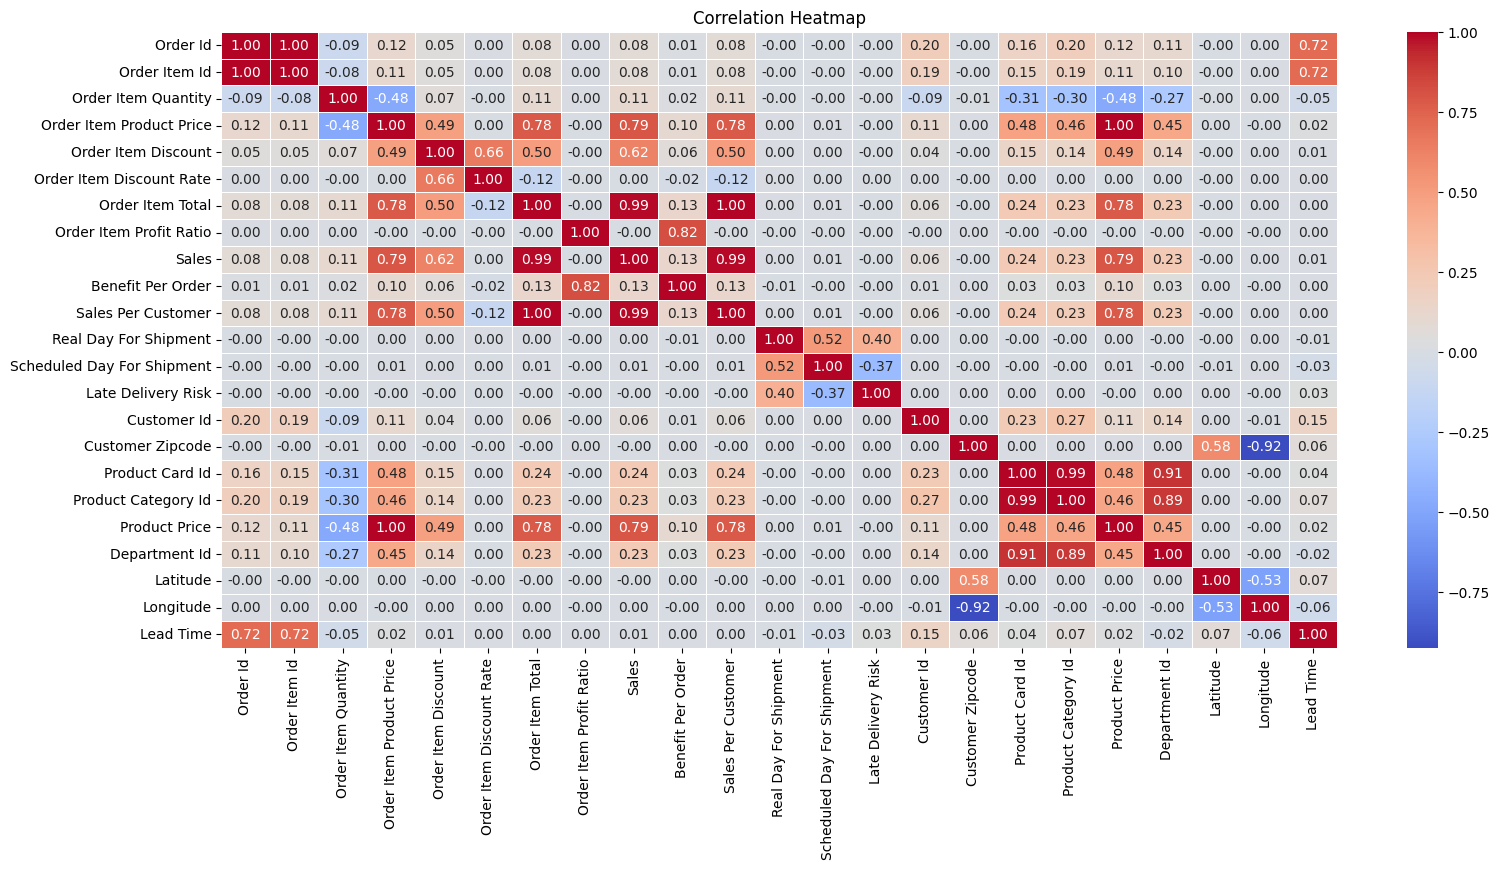

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
# Tính ma trận tương quan
correlation_matrix = numeric_df.corr()

# Vẽ heatmap của ma trận tương quan
plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.to_csv('/content/drive/MyDrive/Capitalism/Project logistics/ITBLogisticDataset_cleaned.csv', index=False)

- Late Delivery Risk & Real Day For Shipment: +0.40 <br>
This suggests that as the actual shipment days increase, the risk of late delivery also rises because longer real shipment times tend to lead to delays.
- Late Delivery Risk & Scheduled Day For Shipment: -0.37 <br>
If scheduled shipment days are shorter (lower), the late delivery risk tends to increase. Possibly, tighter schedules put more pressure on timely delivery, increasing the risk of delays.



## EDA


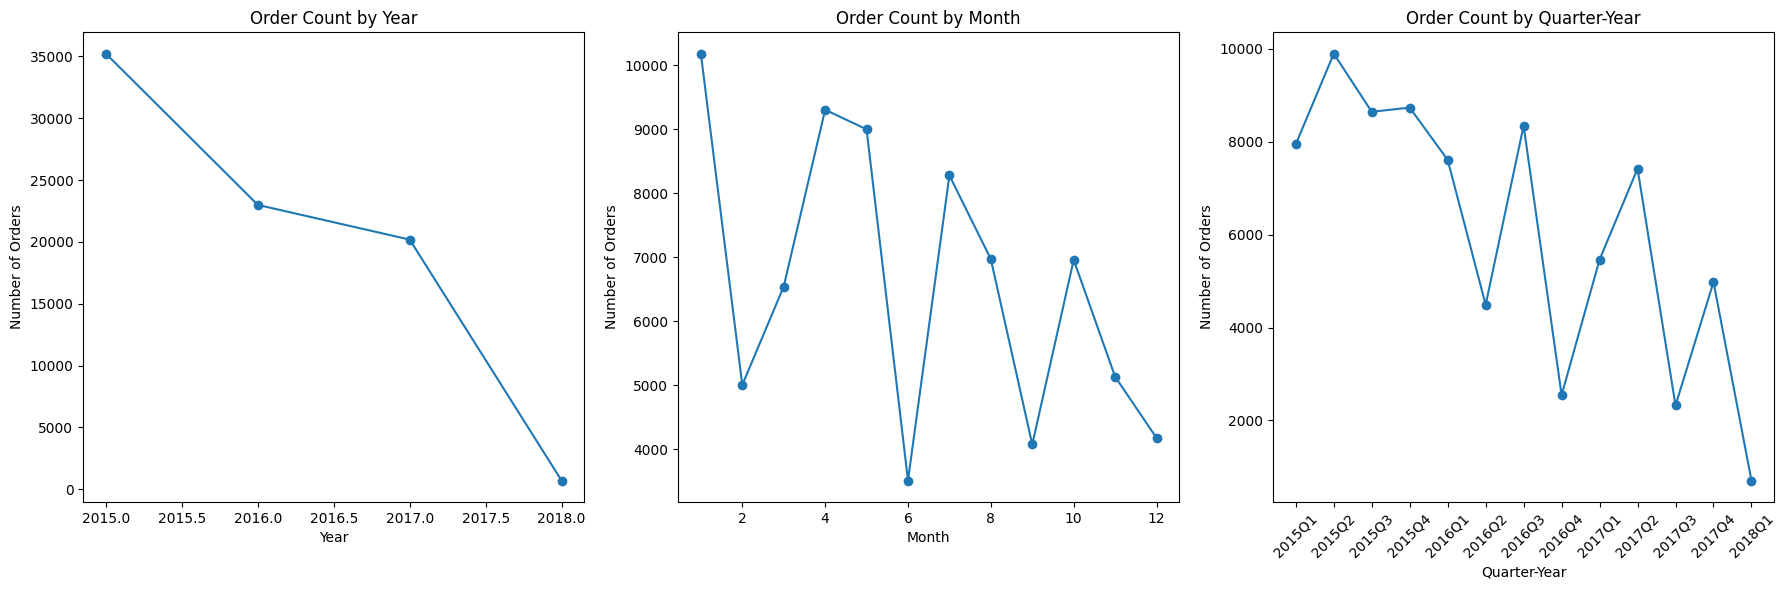

In [ ]:
import matplotlib.pyplot as plt

# Filter orders with status COMPLETE or CLOSED
filtered_df = df[df['Order Status'].isin(['COMPLETE', 'CLOSED'])]

# Calculate order counts by year, month, and quarter-year
order_by_year = filtered_df.groupby('Order Year').size()
order_by_month = filtered_df.groupby('Order Month').size()
order_by_quarter = filtered_df.groupby('Order Quarter-Year').size()  # Use your quarter-year column

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].plot(order_by_year.index, order_by_year.values, marker='o')
axs[0].set_title('Order Count by Year')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Number of Orders')

axs[1].plot(order_by_month.index, order_by_month.values, marker='o')
axs[1].set_title('Order Count by Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Number of Orders')

axs[2].plot(order_by_quarter.index.astype(str), order_by_quarter.values, marker='o')
axs[2].set_title('Order Count by Quarter-Year')
axs[2].set_xlabel('Quarter-Year')
axs[2].set_ylabel('Number of Orders')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


By year

1.  There is a clear downward trend in the number of orders from 2015 to 2018, with the highest number of orders in 2025 (above 35000 orders).
2. The order count drops sharply after 2017 => indicate a decline in business activity

By month:
1. Order volume varies significantly month-to-month within a year.
2. High peaks are visible in months like January, April, May (month 5), July and October. While other months show noticable dips => This suggests a seasonal or cyclical pattern in orders across months.

By quarter:
1. The quarterly view shows fluctuations consistent with the monthly pattern but smoother.


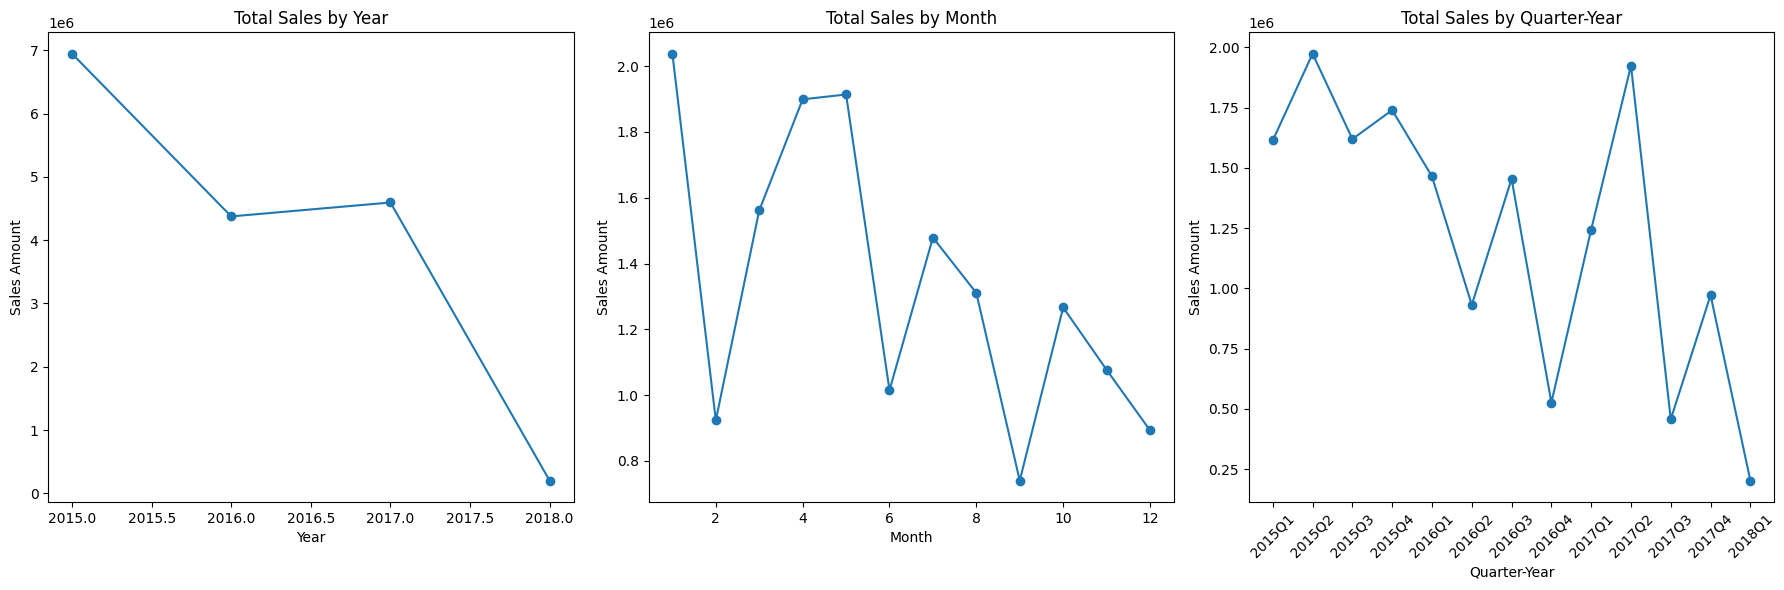

In [ ]:
# Filter orders with status COMPLETE or CLOSED
filtered_df = df[df['Order Status'].isin(['COMPLETE', 'CLOSED'])]

# Aggregate total sales by time dimensions
sales_by_year = filtered_df.groupby('Order Year')['Sales'].sum()
sales_by_month = filtered_df.groupby('Order Month')['Sales'].sum()
sales_by_quarter = filtered_df.groupby('Order Quarter-Year')['Sales'].sum()

# Plotting with line plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].plot(sales_by_year.index, sales_by_year.values, marker='o')
axs[0].set_title('Total Sales by Year')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Sales Amount')

axs[1].plot(sales_by_month.index, sales_by_month.values, marker='o')
axs[1].set_title('Total Sales by Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Sales Amount')

axs[2].plot(sales_by_quarter.index.astype(str), sales_by_quarter.values, marker='o')
axs[2].set_title('Total Sales by Quarter-Year')
axs[2].set_xlabel('Quarter-Year')
axs[2].set_ylabel('Sales Amount')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Year 2015: Highest sales in month 3 with sales amount 1,181,044 and approx. 5362 orders.
Year 2016: Highest sales in month 11 with sales amount 1,276,148 and approx. 5210 orders.
Year 2017: Highest sales in month 3 with sales amount 1,614,071 and approx. 5347 orders.


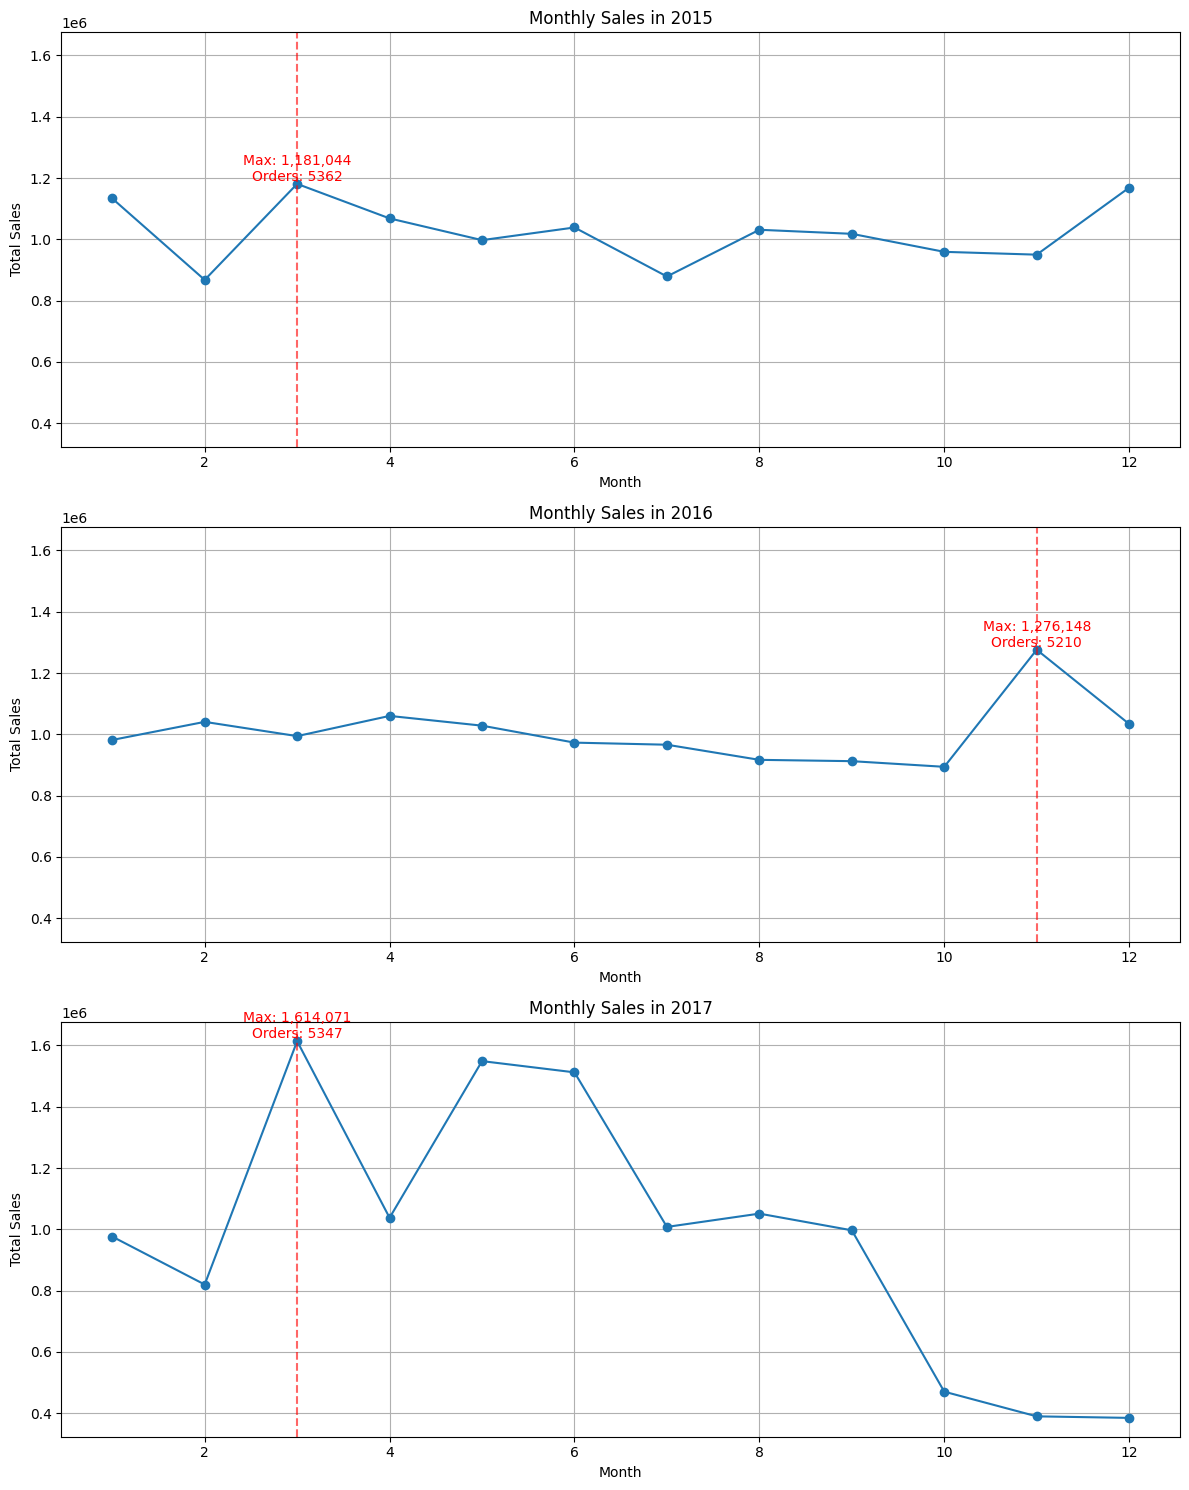

In [ ]:
# Filter for relevant years
df_filtered = df[(df['Order Year'] >= 2015) & (df['Order Year'] <= 2017)]

# Prepare figure with 3 subplots (one for each year)
fig, axs = plt.subplots(3, 1, figsize=(12, 15), sharey=True)

for i, year in enumerate(range(2015, 2018)):
    # Filter data for the year
    df_year = df_filtered[df_filtered['Order Year'] == year]

    # Aggregate total sales and order count by month
    monthly_sales = df_year.groupby('Order Month')['Sales'].sum()
    monthly_orders = df_year.groupby('Order Month').size()

    # Find the month with the max sales
    max_month = monthly_sales.idxmax()
    max_sales = monthly_sales.max()
    max_orders = monthly_orders[max_month]

    print(f"Year {year}: Highest sales in month {max_month} with sales amount {max_sales:,.0f} and approx. {max_orders} orders.")

    # Plot sales
    axs[i].plot(monthly_sales.index, monthly_sales.values, marker='o')
    axs[i].set_title(f"Monthly Sales in {year}")
    axs[i].set_xlabel("Month")
    axs[i].set_ylabel("Total Sales")
    axs[i].grid(True)
    axs[i].axvline(max_month, color='red', linestyle='--', alpha=0.6)
    axs[i].text(max_month, max_sales, f"Max: {max_sales:,.0f}\nOrders: {max_orders}",
                color='red', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
# Filter for on-time delivery statuses
on_time_deliveries = df[df['Delivery Status'] == 'Shipping on time']
# Calculate the on-time delivery rate
on_time_delivery_rate = len(on_time_deliveries) / len(df) * 100
on_time_delivery_rate = round(on_time_delivery_rate, 2)
print(f"On-time delivery rate: {on_time_delivery_rate}%")

On-time delivery rate: 17.83%


In [ ]:
# Filter for late delivery statuses
late_deliveries = df[df['Delivery Status'] == 'Late delivery']
# Calculate the late delivery rate
late_delivery_rate = len(late_deliveries) / len(df) * 100
late_delivery_rate = round(late_delivery_rate, 2)
print(f"Late delivery rate: {late_delivery_rate}%")

Late delivery rate: 54.83%


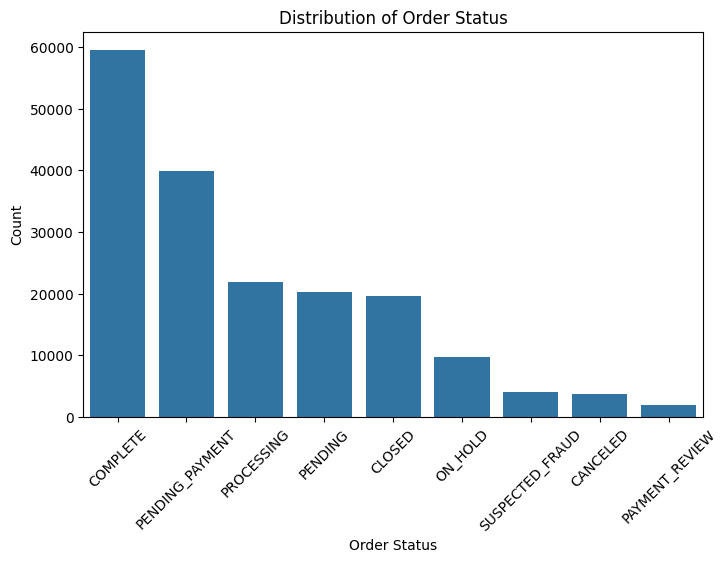

In [ ]:
# 1. Distribution of Order Status
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Order Status', order=df['Order Status'].value_counts().index)
plt.title('Distribution of Order Status')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
avg_stats = df.groupby('Delivery Status')[['Real Day For Shipment', 'Scheduled Day For Shipment']].mean()
print("Average and Shipment Days by Delivery Status:\n", avg_stats)

Average and Shipment Days by Delivery Status:
                    Real Day For Shipment  Scheduled Day For Shipment
Delivery Status                                                     
Advance shipping                2.498161                    4.000000
Late delivery                   4.089278                    2.471073
Shipping canceled               3.476657                    2.903921
Shipping on time                2.975181                    2.975181


- For late delivery: The actual shipment time (4.09 days) exceeds the scheduled time (2.47 days) by approximately 1.6 days on average. <br>
=> The business should prioritize investigating causes behind late deliveries and explore opportunities to replicate “advance shipping” practices.

Order Count by Shipping Mode:
 Shipping Mode
Standard Class    107745
Second Class       35214
First Class        27812
Same Day            9737
dtype: int64


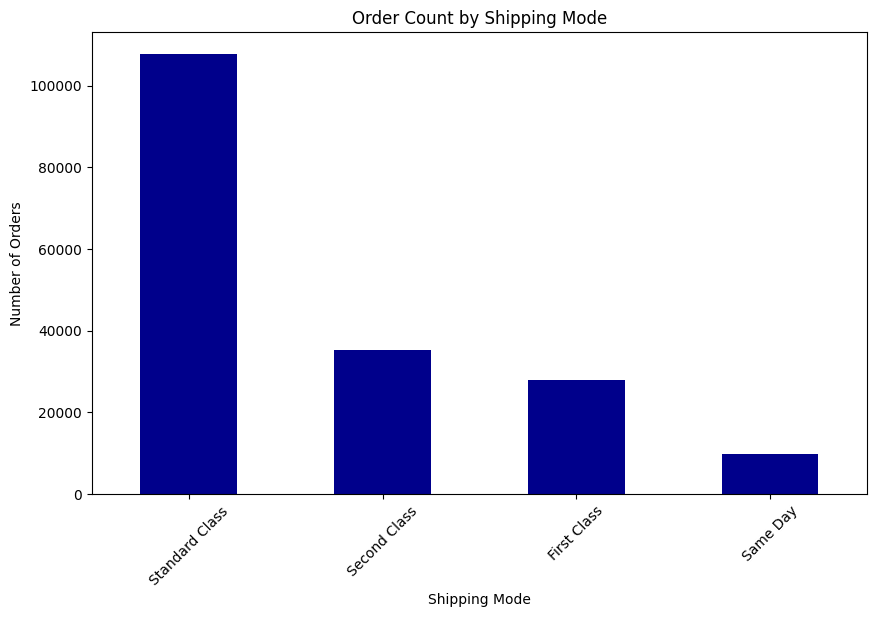

In [ ]:
# Calculate order count by Shipping Mode
order_count_by_shipping = df.groupby('Shipping Mode').size().sort_values(ascending=False)

print("Order Count by Shipping Mode:\n", order_count_by_shipping)

# Plot order counts
plt.figure(figsize=(10,6))
order_count_by_shipping.plot(kind='bar', color='darkblue')
plt.title('Order Count by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()


Late Delivery Risk Rate by Shipping Mode:
 Shipping Mode
First Class       0.953222
Second Class      0.766343
Same Day          0.457430
Standard Class    0.380723
Name: Late Delivery Risk, dtype: float64


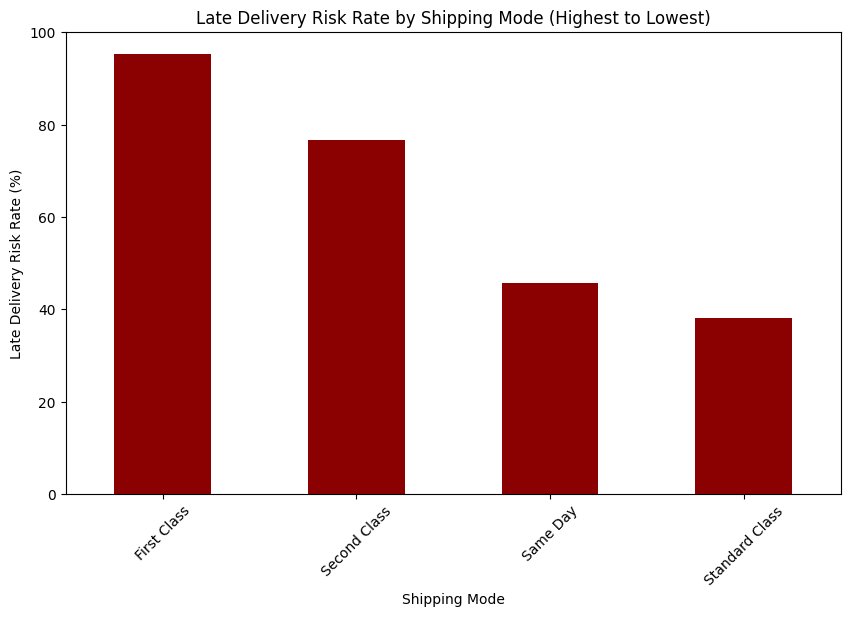

In [ ]:
# Calculate late delivery risk rate (%) by Shipping Mode and sort descending
late_risk_rate = df.groupby('Shipping Mode')['Late Delivery Risk'].mean().sort_values(ascending=False)

print("Late Delivery Risk Rate by Shipping Mode:\n", late_risk_rate)

# Plot late delivery risk rates with dark blue color, descending order
plt.figure(figsize=(10,6))
(late_risk_rate * 100).plot(kind='bar', color='darkred')
plt.title('Late Delivery Risk Rate by Shipping Mode (Highest to Lowest)')
plt.xlabel('Shipping Mode')
plt.ylabel('Late Delivery Risk Rate (%)')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()


- The most popular shipping mode (Standard Class) is also the most reliable in terms of on-time delivery (lowest late delivery risk ~ 38%)
- Premium shipping options (First and Second Class) experience the highest rates of late delivery, which could hurt customer satisfaction and trust.
- Same Day shipping, although less common, performs better than other premium options but still faces moderate risk.

The company should investigate operational bottlenecks or challenges specifically impacting premium shipping methods and work on improving their reliability.



In [ ]:
# Calculate order count by state
order_count_by_state = df.groupby('Customer State').size()

# Get top 10 states by order count
top_10_states = order_count_by_state.sort_values(ascending=False).head(10)

# Calculate total orders across all states
total_orders = order_count_by_state.sum()

# Calculate percentage of orders in top 10 states
percentage_top_10_states = (top_10_states.sum() / total_orders) * 100

print(f"Percentage of orders from top 10 states: {percentage_top_10_states:.2f}%")


Percentage of orders from top 10 states: 81.45%


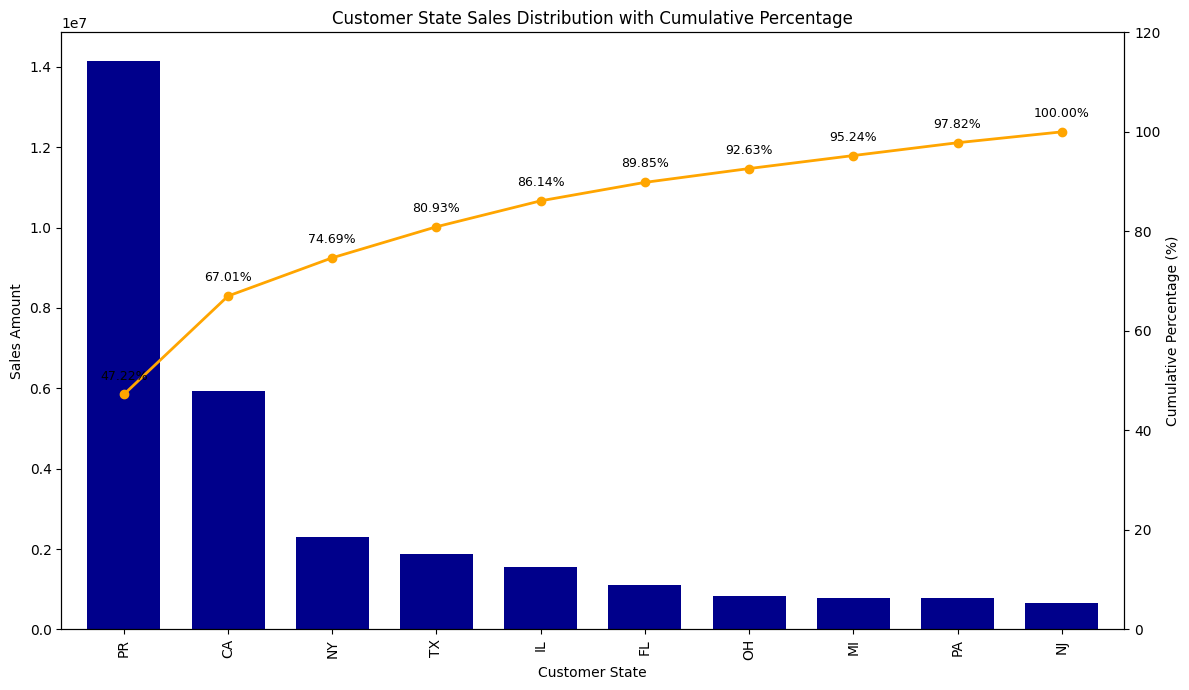

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Aggregate total sales by state
sales_by_state = df.groupby('Customer State')['Sales'].sum()

# Sort descending and select top 10 states
top_10 = sales_by_state.sort_values(ascending=False).head(10)

# Calculate cumulative percentage
cumulative_percentage = top_10.cumsum() / top_10.sum() * 100

# Plot
fig, ax1 = plt.subplots(figsize=(12, 7))

# Bar plot for total sales
top_10.plot(kind='bar', color='darkblue', width=0.7, ax=ax1)

ax1.set_ylabel('Sales Amount')
ax1.set_xlabel('Customer State')
ax1.set_title('Customer State Sales Distribution with Cumulative Percentage')
ax1.grid(False)

# Secondary axis for cumulative percentage line
ax2 = ax1.twinx()
ax2.plot(top_10.index, cumulative_percentage, color='orange', marker='o', linewidth=2)
ax2.set_ylabel('Cumulative Percentage (%)', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, 120)  # space above 100%

# Show percentage values on line plot in dark color for better visibility
for i, cp in enumerate(cumulative_percentage):
    ax2.text(i, cp + 3, f'{cp:.2f}%', color='black', ha='center', fontsize=9)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Using the Pareto Principle, we can see that the cumulative percentage curve confirms the 80/20 rule roughly holds here:
- About 4 states account for over 80% of sales.
- More than 80% of orders come from these top 10 states

So that we will look further into these states to analyze late delivery rates in detail and develop targeted solutions

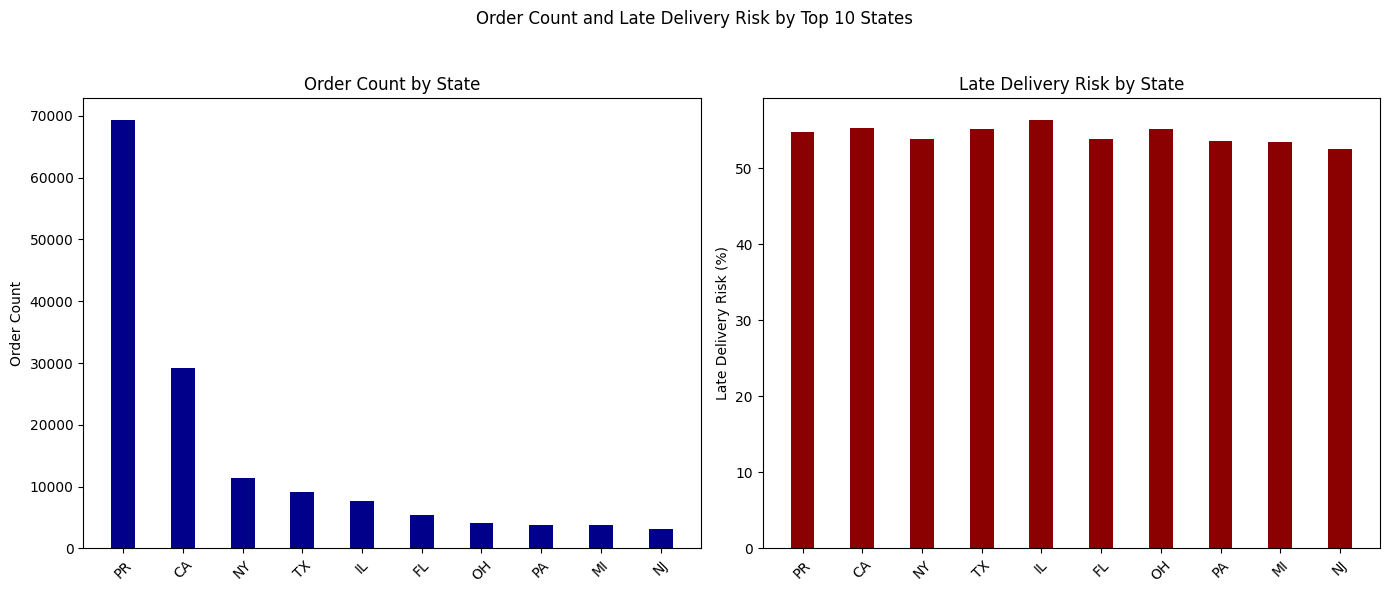

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
states = top_states.index
order_counts = top_states.values
late_risk_percent = late_risk_stats.values * 100

x = np.arange(len(states))
width = 0.4

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), sharex=True)

# Plot Order Counts
ax1.bar(x, order_counts, width, color='darkblue')
ax1.set_ylabel('Order Count')
ax1.set_title('Order Count by State')
ax1.set_xticks(x)
ax1.set_xticklabels(states, rotation=45)

# Plot Late Delivery Risk
ax2.bar(x, late_risk_percent, width, color='darkred')
ax2.set_ylabel('Late Delivery Risk (%)')
ax2.set_title('Late Delivery Risk by State')
ax2.set_xticks(x)
ax2.set_xticklabels(states, rotation=45)

plt.suptitle('Order Count and Late Delivery Risk by Top 10 States')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


- The majority of orders come from a few states, especially PR (Puerto Rico), which has by far the highest order count (~70,000 orders).
- However, the late delivery risk across all top 10 states is quite high and fairly uniform, ranging roughly between 52% and 56%.
- Despite large differences in order counts (e.g., PR vs. NJ), late delivery risk rates are very close. This may imply that operational issues leading to late delivery are systemic rather than volume-driven.

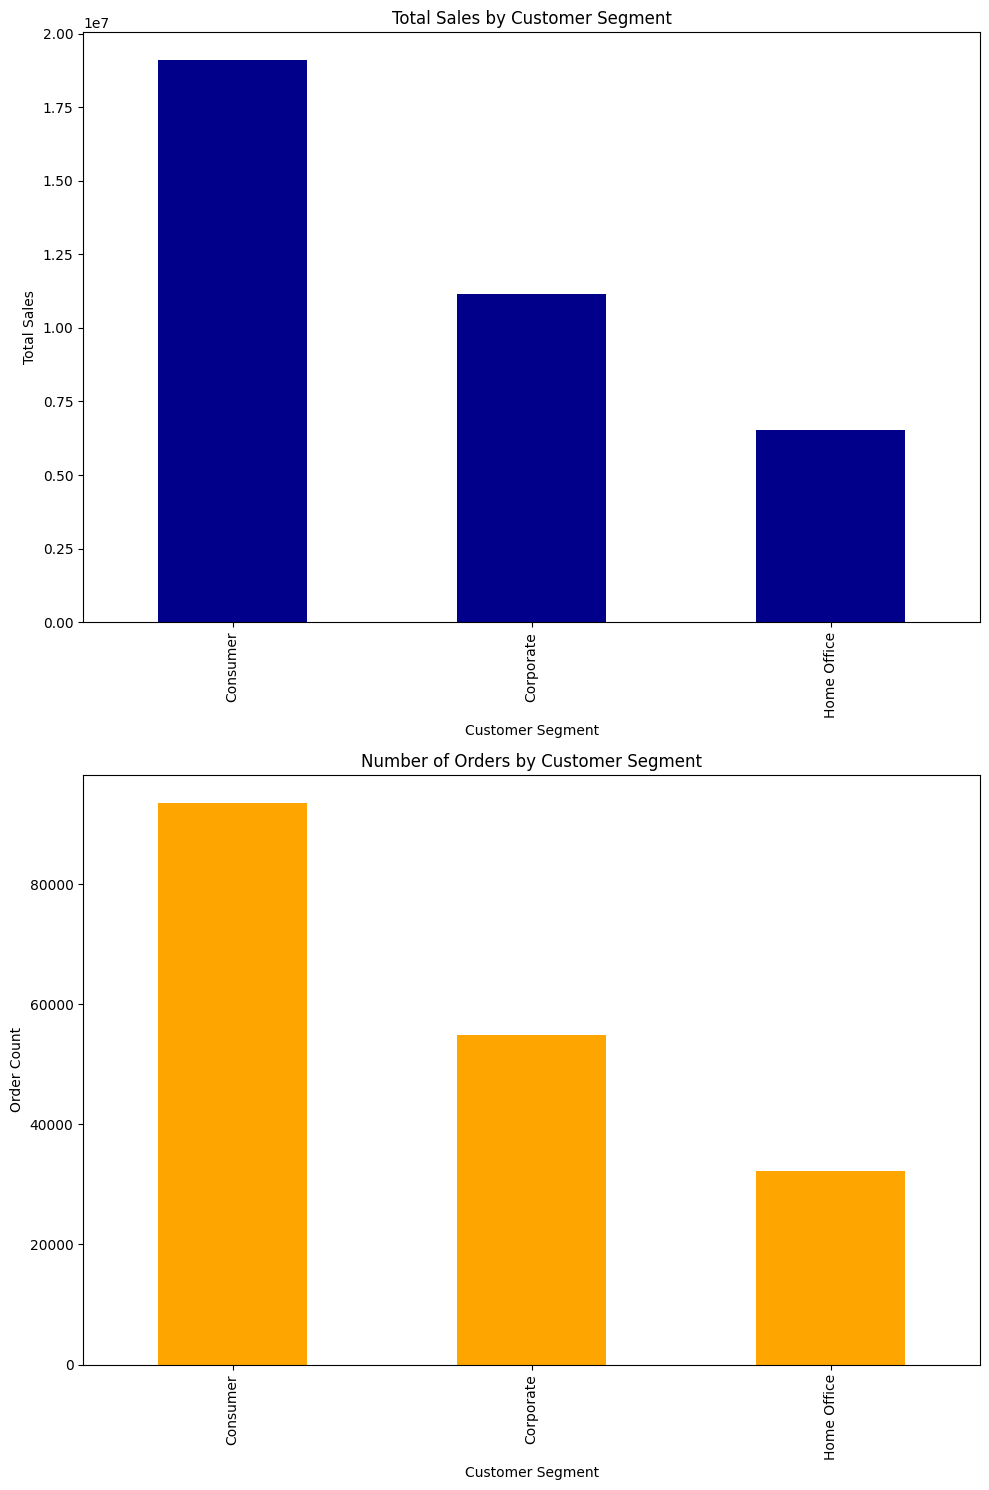

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Sales by Customer Segment
sales_by_segment = df.groupby('Customer Segment')['Sales'].sum().sort_values(ascending=False)

# 2. Orders by Customer Segment
orders_by_segment = df.groupby('Customer Segment').size().sort_values(ascending=False)

# Plotting results
fig, axs = plt.subplots(2, 1, figsize=(10, 15))

sales_by_segment.plot(kind='bar', ax=axs[0], color='darkblue')
axs[0].set_title('Total Sales by Customer Segment')
axs[0].set_ylabel('Total Sales')

orders_by_segment.plot(kind='bar', ax=axs[1], color='orange')
axs[1].set_title('Number of Orders by Customer Segment')
axs[1].set_ylabel('Order Count')

for ax in axs:
    ax.set_xlabel('Customer Segment')
    ax.grid(False)

plt.tight_layout()
plt.show()


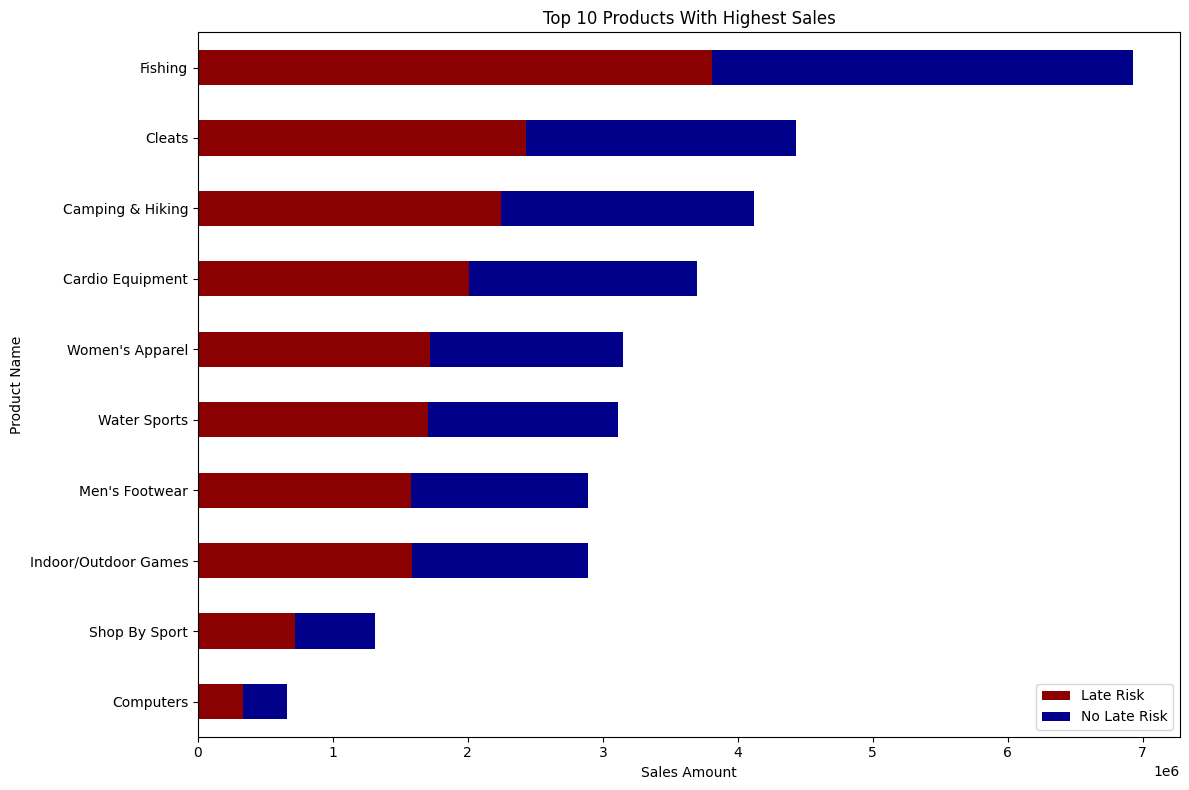

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Aggregate sales by product and late risk
sales_by_product_risk = df.groupby(['Category Name', 'Late Delivery Risk'])['Sales'].sum().unstack(fill_value=0)

# Add total sales column
sales_by_product_risk['Total'] = sales_by_product_risk.sum(axis=1)

# Select top 10 products by total sales
top_10_products = sales_by_product_risk.sort_values('Total', ascending=False).head(10)

# Sort ascending for better horizontal bar visualization
top_10_products_sorted = top_10_products.sort_values('Total', ascending=True)

# Plot stacked horizontal bar chart
ax = top_10_products_sorted[[1, 0]].plot(kind='barh', stacked=True, figsize=(12, 8), color=['darkred', 'darkblue'])

plt.title('Top 10 Products With Highest Sales')
plt.xlabel('Sales Amount')
plt.ylabel('Product Name')
plt.legend(['Late Risk', 'No Late Risk'])
plt.tight_layout()
plt.show()


- Most products show a relatively balanced split between sales with late delivery risk (red) and without late delivery risk (blue).
- This indicates late delivery is a common issue across major products, not isolated to a few.